# Churn Prediction - Eduardo Chaves

## Qual o problema?

O objetivo deste projeto é ter um modelo preditivo que tenha a capacidade de identificar a porcentagem de um cliente evadir ou não de uma empresa de telecomunicações, baseado em variáveis a qual o modelo foi treinado. Para isso será usado um *Data Set* com dados verídicos de uma empresa real na área de telecomunicações.

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=Warning)
sns.set_style("whitegrid")
# importando pacotes iniciais para o projeto

In [2]:
# importando o data set e visualizando-o
df = pd.read_csv('./assets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## 1. Análise Exploratória

Passo usado para melhor conhecimento / entendimento do DF (Data Frame). Assim também para saber o que necessitará de tratamento antes da realização dos treinamentos de ML (Machine Learning)

In [3]:
df.duplicated().sum()
# verificar se há linhas duplicadas

0

In [4]:
df.info()
# visão geral dos dados e features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df.describe()
# visão estatística das features numéricas

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.TotalCharges.describe()
# foi descoberto que a feature TotalCharges não está no tipo de dado apropriado

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

### Convertendo o tipo de dado da feature TotalCharges para o tipo correto (float)

In [7]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, downcast='float', errors='coerce')
# convertendo a feature totalcharges em float, e em caso de erros deixar o valor como nulo (errors='coerce')

In [8]:
df.TotalCharges.info()
# vemos que agora está em float

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float32
dtypes: float32(1)
memory usage: 27.6 KB


In [9]:
df.TotalCharges.isnull().sum()
# vemos que foi detectado 11 valore nulos

11

In [10]:
df.dropna(inplace=True)
# removendo os valores nulos com o método de remover a coluna inteira
# decidi tomar esse método por ter uma quantidade ínfima de valores nulos em comparação com o df inteiro

In [11]:
df.TotalCharges.isnull().sum()
# verificando que não há mais valores nulos

0

In [12]:
df.describe()
# agora com o tipo de dado correto podemos observar suas características estatísticas

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300537
std,0.368844,24.545260,30.085974,2266.770508
min,0.000000,1.000000,18.250000,18.799999
25%,0.000000,9.000000,35.587500,401.449997
50%,0.000000,29.000000,70.350000,1397.475037
75%,0.000000,55.000000,89.862500,3794.737488
max,1.000000,72.000000,118.750000,8684.799805


### Outras análises através de visualização gráfica

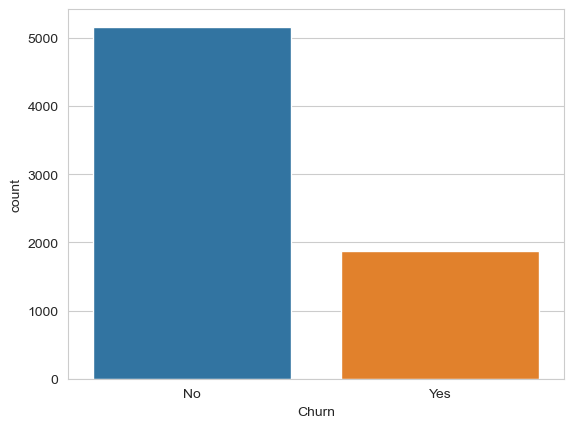

In [13]:
fig = sns.countplot(x='Churn', data=df)
plt.show()

fig = fig.figure
fig.savefig('./assets/graphs/churn.png', dpi=300, bbox_inches='tight')

# aqui verificamos que há um grande desbalancemento na feature target (Churn) que precisa ser tratada posteriormente

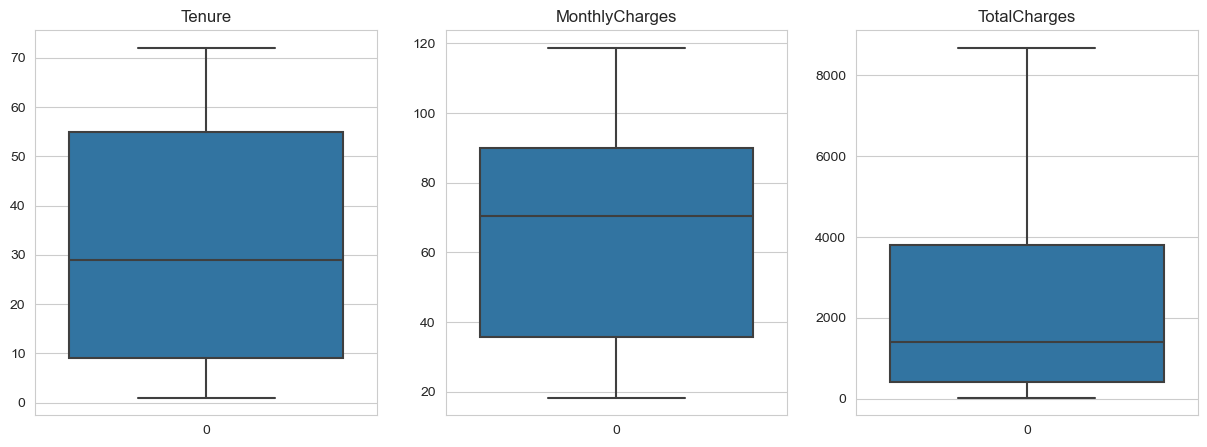

In [14]:
fig, ax = plt.subplots(1,3, figsize =(15,5))

sns.boxplot(df.tenure, ax=ax[0]).set(title='Tenure')
sns.boxplot(df.MonthlyCharges, ax=ax[1]).set(title='MonthlyCharges')
sns.boxplot(df.TotalCharges, ax=ax[2]).set(title='TotalCharges')
plt.show()

fig = fig.figure
fig.savefig('./assets/graphs/numeric-features.png', dpi=300, bbox_inches='tight')

# aqui verificamos que não há valores outliers através do gráfico boxplot

#### Visualização das Features Demográficas

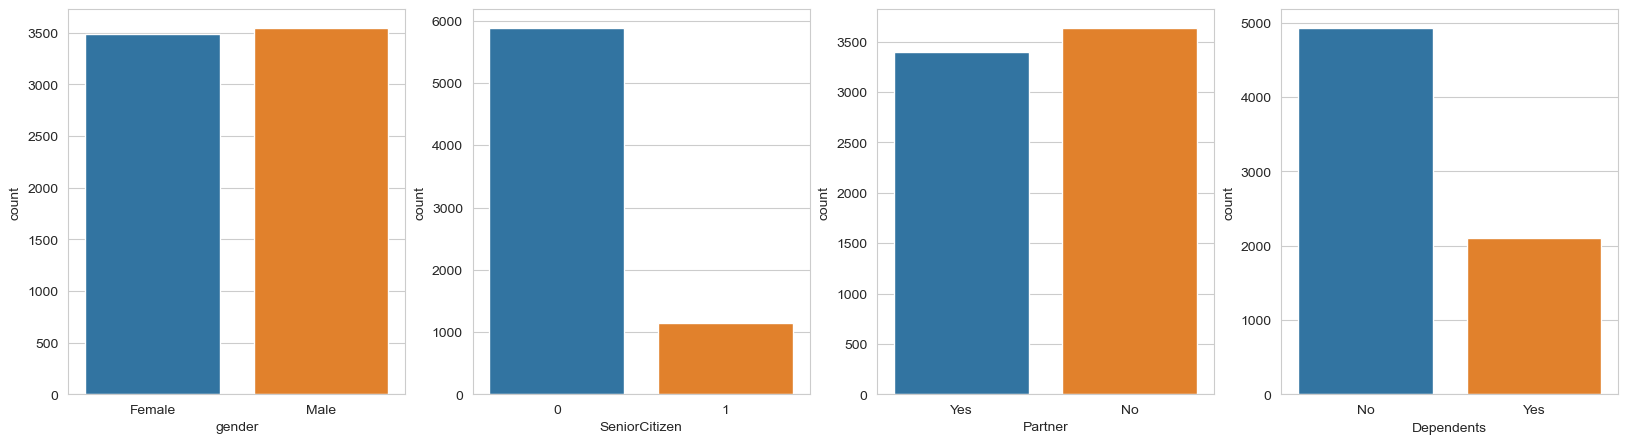

In [15]:
fig, ax = plt.subplots(1,4, figsize=(20,5))

sns.countplot(x= df.gender, ax=ax[0])
sns.countplot(x= df.SeniorCitizen, ax=ax[1])
sns.countplot(x= df.Partner, ax=ax[2])
sns.countplot(x= df.Dependents, ax=ax[3])
plt.show()

fig = fig.figure
fig.savefig('./assets/graphs/demographic-features.png', dpi=300, bbox_inches='tight')

#### Visualização das Features de Serviços

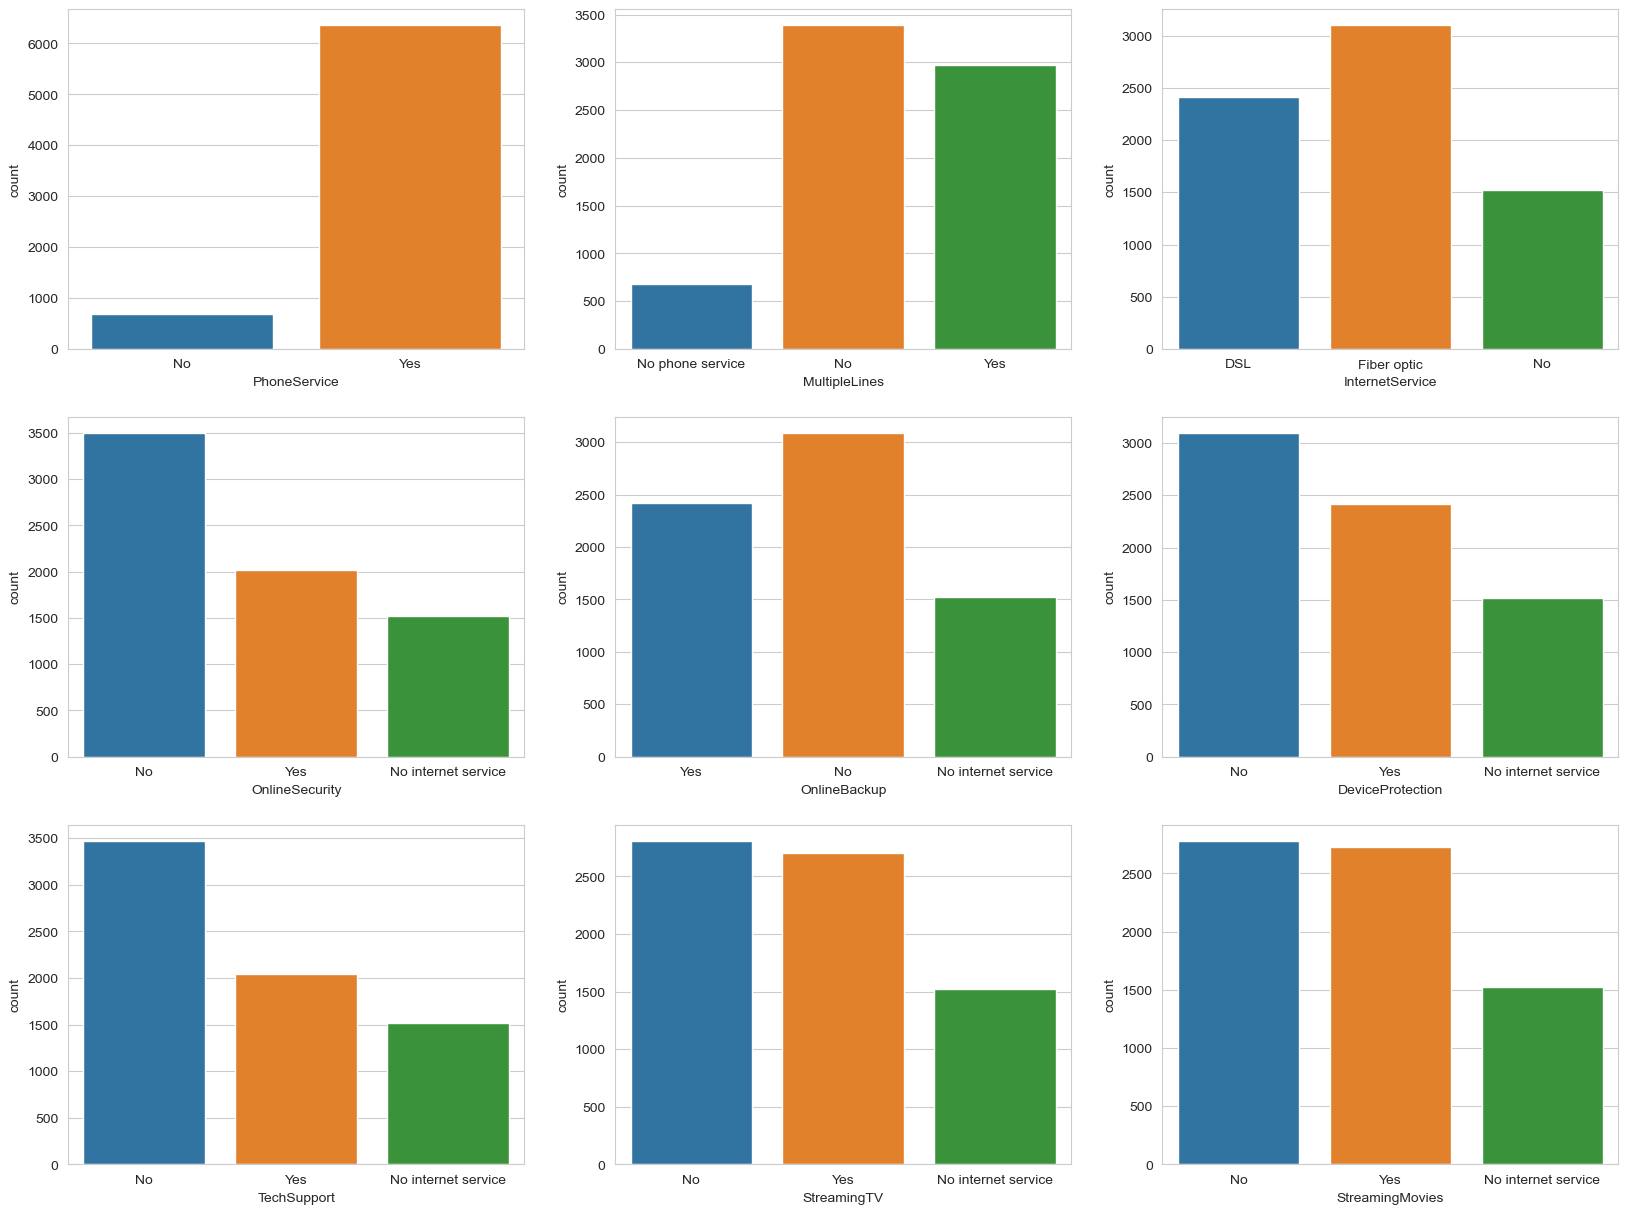

In [16]:
fig, ax = plt.subplots(3,3, figsize=(20,15))

sns.countplot(x= df.PhoneService, ax=ax[0,0])
sns.countplot(x= df.MultipleLines, ax=ax[0,1])
sns.countplot(x= df.InternetService, ax=ax[0,2])
sns.countplot(x= df.OnlineSecurity, ax=ax[1,0])
sns.countplot(x= df.OnlineBackup, ax=ax[1,1])
sns.countplot(x= df.DeviceProtection, ax=ax[1,2])
sns.countplot(x= df.TechSupport, ax=ax[2,0])
sns.countplot(x= df.StreamingTV, ax=ax[2,1])
sns.countplot(x= df.StreamingMovies, ax=ax[2,2])
plt.show()

fig = fig.figure
fig.savefig('./assets/graphs/services-features.png', dpi=300, bbox_inches='tight')

#### Visualização das Features de Contrato / Pagamento

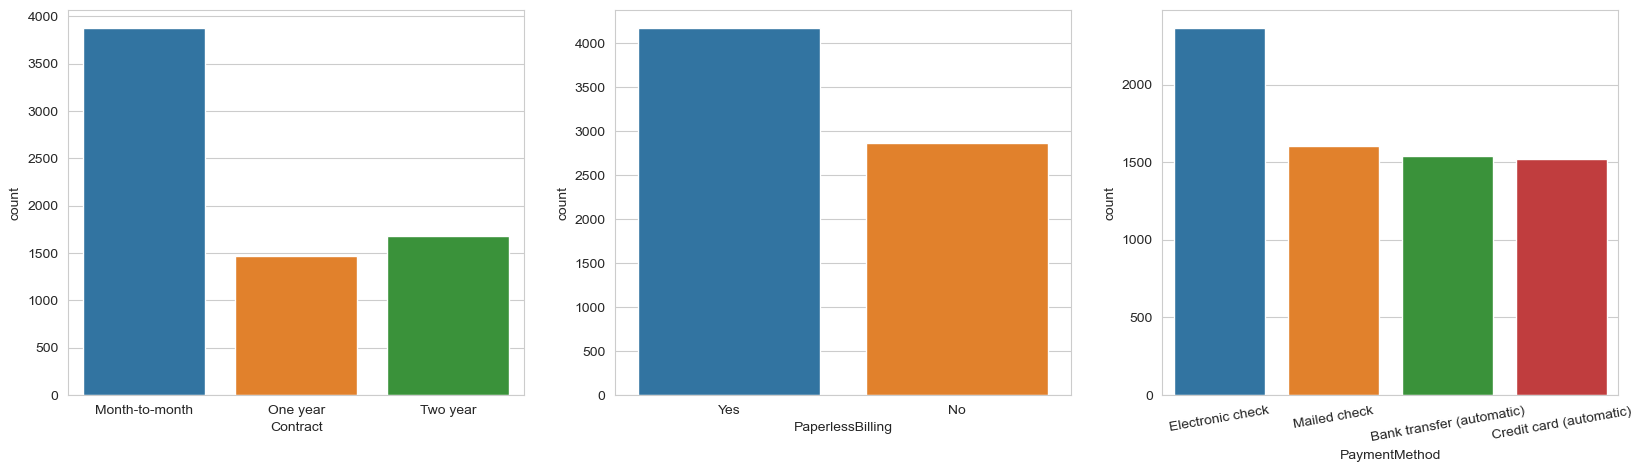

In [17]:
fig, ax = plt.subplots(1,3, figsize=(20,5))

sns.countplot(x= df.Contract, ax=ax[0])
sns.countplot(x= df.PaperlessBilling, ax=ax[1])
sns.countplot(x= df.PaymentMethod, ax=ax[2])

plt.xticks(rotation=10)
plt.show()

fig = fig.figure
fig.savefig('./assets/graphs/contract-features.png', dpi=300, bbox_inches='tight')

---
## 2. Pré-Processamento dos Dados

Nesta fase será feito o pré-processamento dos dados a fim de deixá-los na melhor forma possível antes de utilizá-los na fase de treinamento de modelos preditivos

In [18]:
df.drop(['customerID'], axis=1, inplace=True)
# removendo a coluna id que não será usada

### Categorical Encoding

Transformando os dados das features categóricas em números (Label Encoding) para melhor adequamento ao treinamento pelos modelos preditivos

Além disso será necessário alterar o tipo de dado das features categóricas para 'category', assim o modelo preditivo lidará com o mesmo de forma adequada

In [19]:
print(df.MultipleLines.unique())
print(df.OnlineSecurity.unique())
# verificando dados redundandtes (ex.: no phone service = no )
# identifiquei que esses dados redundandtes não ajudam no modelo preditivo, apenas trazendo mais
# complexidade no treinamento, predições e construção da dashboard com o stramlit, então por esses motivos decidi transformalos em 'não'

['No phone service' 'No' 'Yes']
['No' 'Yes' 'No internet service']


In [20]:
df.replace(('No phone service', 'No internet service'), 'No', inplace=True)

print(df.MultipleLines.unique())
print(df.OnlineSecurity.unique())
# removendo a redundancia

['No' 'Yes']
['No' 'Yes']


In [21]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

# importando a ferramenta label_encoder do scikitlean

In [22]:
df.info()
# verificando as features que precisam trocar o data type para category

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [23]:
categorical_features = df.drop(['TotalCharges', 'MonthlyCharges', 'tenure'], axis=1)
categorical_features.info()
# definindo uma variável com as features que precisam ser trocadas, através da remoção das 3 únicas features que não serão modificadas

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   gender            7032 non-null   object
 1   SeniorCitizen     7032 non-null   int64 
 2   Partner           7032 non-null   object
 3   Dependents        7032 non-null   object
 4   PhoneService      7032 non-null   object
 5   MultipleLines     7032 non-null   object
 6   InternetService   7032 non-null   object
 7   OnlineSecurity    7032 non-null   object
 8   OnlineBackup      7032 non-null   object
 9   DeviceProtection  7032 non-null   object
 10  TechSupport       7032 non-null   object
 11  StreamingTV       7032 non-null   object
 12  StreamingMovies   7032 non-null   object
 13  Contract          7032 non-null   object
 14  PaperlessBilling  7032 non-null   object
 15  PaymentMethod     7032 non-null   object
 16  Churn             7032 non-null   object
dtypes: int64(1), o

In [24]:
for feature in categorical_features.columns:
  df[feature] = label_encoder.fit_transform(df[feature]) # transformando as categorias em 1,2,3...
  df[feature] = df[feature].astype('category') # trocando o data type das features para 'category'

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7032 non-null   category
 1   SeniorCitizen     7032 non-null   category
 2   Partner           7032 non-null   category
 3   Dependents        7032 non-null   category
 4   tenure            7032 non-null   int64   
 5   PhoneService      7032 non-null   category
 6   MultipleLines     7032 non-null   category
 7   InternetService   7032 non-null   category
 8   OnlineSecurity    7032 non-null   category
 9   OnlineBackup      7032 non-null   category
 10  DeviceProtection  7032 non-null   category
 11  TechSupport       7032 non-null   category
 12  StreamingTV       7032 non-null   category
 13  StreamingMovies   7032 non-null   category
 14  Contract          7032 non-null   category
 15  PaperlessBilling  7032 non-null   category
 16  PaymentMethod     7032 n

In [25]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,2,29.85,29.850000,0
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,3,56.95,1889.500000,0
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,3,53.85,108.150002,1
3,1,0,0,0,45,0,0,0,1,0,1,1,0,0,1,0,0,42.30,1840.750000,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.649994,1


### Normalização das features contínuas (numéricas)

Dessa forma todas as features númericas estarão entre 0 e 1, porém com sua escala preservada

`Depois decidi por remover esta etapa do preprocessamento por conta de incompatibilidade ao fazer a predição no dashboard com streamlit. Mas verifiquei que a precisão do modelo não diminuiu pela falta desta etapa.`

In [26]:
# df_features_range = df[['tenure', 'MonthlyCharges', 'TotalCharges']]

In [27]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()

# for feature in df_features_range.columns:
#   df[feature] = scaler.fit_transform(df[feature].values.reshape(-1,1))

# df.head()

In [28]:
# df.describe()
# podemos ver através do 'min' e 'max', que nossas features estão normalizadas (0~1)

### Teste de Multicolinearidade

In [29]:
import statsmodels.api as sm

def calculate_vif(data):
  vif_df = pd.DataFrame(columns = ['Var', 'Vif'])
  x_var_names = df.columns

  for i in range(0, x_var_names.shape[0]):
    y = df[x_var_names[i]]
    x = df[x_var_names.drop([x_var_names[i]])]
    r_squared = sm.OLS(y,x).fit().rsquared
    vif = round(1/(1-r_squared), 2)
    vif_df.loc[i] = [x_var_names[i], vif]

  return vif_df.sort_values(by = 'Vif', axis = 0, ascending = False, inplace = False)

# algorítimo que gera uma tabela exibindo as features com maior nível de colinearidade (vif)

In [30]:
calculate_vif(df).head()
# cheguei a remover as 3 maiores em três tentativas diferentes e a precisão não aumentou, então deixarei assim mesmo

,Var,Vif
17,MonthlyCharges,31.49
5,PhoneService,16.03
18,TotalCharges,15.31
4,tenure,14.71
7,InternetService,4.43


---
## 3. Criação e Avaliação dos Modelos Preditivos

### Criação

In [31]:
from sklearn.model_selection import train_test_split, cross_val_score
import lightgbm as lgbm

In [32]:
model = lgbm.LGBMClassifier(seed=42, objective='binary')
# usando modelo 'light gradient-boosting machine' com o objetivo binário por se tratar de uma classificação binária (churn ou não churn)

In [33]:
x = df.drop(['Churn'], axis=1)
y = df.Churn
# Separação dos dados das features da feature target

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.33, random_state=42)
# separação entre treino e teste das features/classe target

In [35]:
cross_val_score(model, x_train, y_train, cv=5).mean()
# fazendo o cross validation para ter uma acurácia (de acordo com o modelo escolhido)
# mais generalizada por todo o nosso df, ao invés de apenas a parte que definimos como test

0.7930373092155181

### Balanceamento das Features com a Classe Target

In [36]:
y.value_counts()
# exibindo o desbalanceamento atual

0    5163
1    1869
Name: Churn, dtype: int64

In [37]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# será utilizado o balancemento da feature target através do método de over_sampling, usando do algorítimo smote onde será gerado dados artificiais

In [38]:
x_train, y_train = smote.fit_resample(x_train, y_train)
y_train.value_counts()
# agora a classe está balanceada

0    3452
1    3452
Name: Churn, dtype: int64

#### Grid Search
Logo abaixo está o código para uma busca por melhores hiperparâmetros através da técnica do Grid Search

Eu pessoalmente decidi não usar essa técnica pois não trouxe um maior resultado comparado com o modelo acima sem essa busca por hiperparâmetros (além de consumir muito tempo e recurso nesta tarefa), mas deixarei aqui abaixo o código comentado apenas como registro de meu aprendizdo neste meu primeiro projeto em Data Analytics & Machine Learning

In [39]:
# grid = GridSearchCV(lgbm.LGBMClassifier(), {
#     'boosting_type': ['dart', 'gbdt'],
#     'num_iterations': [400, 500, 600, 700],
#     'learning_rate': [.1, .05],
#     'num_leaves': [70, 180],
#     'max_depth': [7, 8],
#     'seed': [42],
# }, cv=5)

# definindo o grid search a fim de buscar os melhores parâmetros para o modelo preditivo.
# Juntamente com o uso de cross-validation em 5 etapas para uma precisão geral, evitando overfitting

In [40]:
# grid.fit(x_train, y_train)
# realizando os treinamentos do grid search para descobrir os melhores parâmetros

In [41]:
# grid.best_score_ * 100
# maior precisão provinda do grid search

In [42]:
# best_parameters = grid.best_params_
# best_parameters
# melhores parâmetros captados pelo grid search

In [43]:
# model = lgbm.LGBMClassifier(
#   num_leaves = best_parameters['num_leaves'],
#   max_depth = best_parameters['max_depth'],
#   boosting_type = best_parameters['boosting_type'],
#   learning_rate = best_parameters['learning_rate'],
#   num_iterations = best_parameters['num_iterations'],
#   seed = 42,
#   objective = 'binary',
# )

# criando o modelo final com os melhores parâmetros captados pelo grid search

### Avaliação

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [45]:
model.fit(x_train, y_train)
# ajustando o modelo aos dados de treino

LGBMClassifier(objective='binary', seed=42)

In [46]:
y_predict = model.predict(x_test)
# realizando a predição do modelo com os dados de teste

In [47]:
print(classification_report(y_test, y_predict))
# exibindo o resultado da predição

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1711
           1       0.61      0.53      0.57       610

    accuracy                           0.79      2321
   macro avg       0.73      0.70      0.71      2321
weighted avg       0.78      0.79      0.78      2321



In [48]:
print(roc_auc_score(y_test, y_predict))
# métrica de acurácia com a AUC ROC

0.7045553841584349


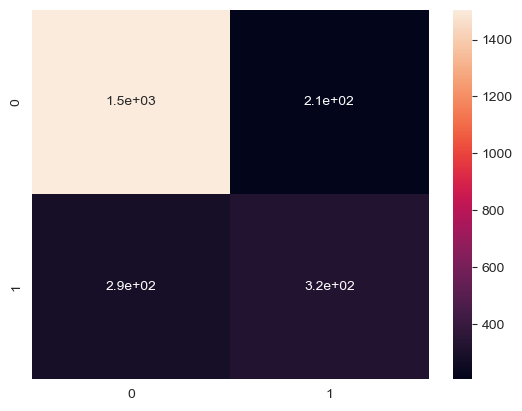

In [49]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()
# resultado da predição através da tabela matriz de confusão

### Compreendendo as features que mais impactam a classe target (Churn)

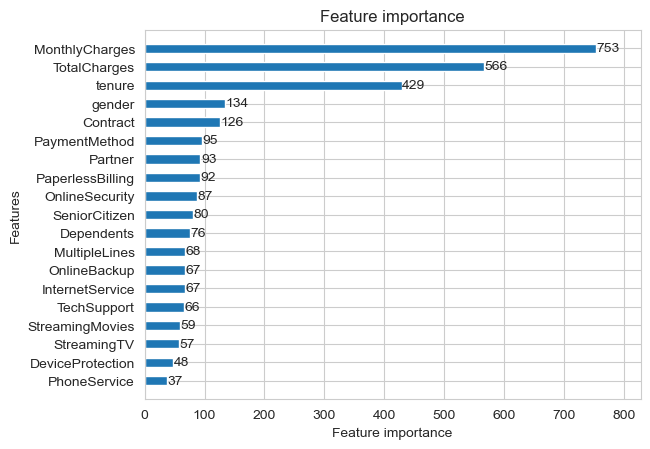

In [50]:
fig = lgbm.plot_importance(model, height=.5)
plt.show()

In [51]:
fig = fig.figure
fig.savefig('./assets/graphs/feature-importance.png', dpi=300, bbox_inches='tight')
# salvando a figura em uma pasta a fim de axibí-la na dash do streamlit

### Salvando o modelo final em um arquivo a parte

In [52]:
import joblib

joblib.dump(model, './assets/churn-prediction-model')
# salvando o modelo treinado em um arquivo a parte para usá-lo nas predições realizadas na dash do streamlit

['./assets/churn-prediction-model']